In [1]:
%matplotlib inline
import torch
import numpy as np
import include.d2l_pytorch as d2l

In [2]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6],5
features = torch.randn((n_train + n_test, 1))
poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1)
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:,1] + true_w[2] * poly_features[:, 2] + true_b)
labels += torch.tensor(np.random.normal(0,0.01, size=labels.size()), dtype=torch.float)

In [3]:
features[:2], poly_features[:2], labels[:2]

(tensor([[-1.9709],
         [ 0.4212]]),
 tensor([[-1.9709,  3.8846, -7.6562],
         [ 0.4212,  0.1774,  0.0747]]),
 tensor([-53.4417,   5.3164]))

In [4]:
num_epochs, loss = 100, torch.nn.MSELoss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = torch.nn.Linear(train_features.shape[-1], 1)
    batch_size = min(10, train_labels.shape[0])
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)

    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1,1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1,1)
        test_labels = test_labels.view(-1,1)
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss', range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.weight.data, '\nbias:', net.bias.data)

final epoch: train loss 8.937410893850029e-05 test loss 8.779648487688974e-05
weight: tensor([[ 1.1984, -3.4001,  5.6003]]) 
bias: tensor([5.0008])


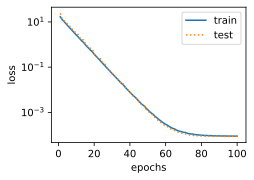

In [5]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train: , :], labels[:n_train], labels[n_train:])

final epoch: train loss 109.9808578491211 test loss 260.626953125
weight: tensor([[16.4077]]) 
bias: tensor([2.2291])


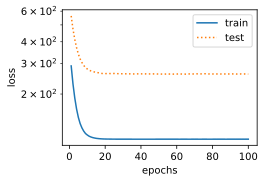

In [6]:
fit_and_plot(features[:n_train, :], features[n_train: , :], labels[:n_train], labels[n_train:])

final epoch: train loss 0.9794378876686096 test loss 7.294214248657227
weight: tensor([[ 3.1690, -1.9690,  5.4939]]) 
bias: tensor([2.5206])


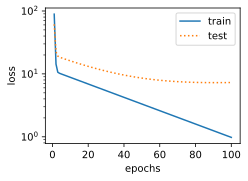

In [7]:
fit_and_plot(poly_features[:2, :], poly_features[n_train: , :], labels[:2], labels[n_train:])